# Data-Wrangling for Credit Card Default Data

### Import libraries and modify notebook settings

In [1]:
# Import libraries
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from IPython.display import display, HTML, Markdown

# Modify notebook settings
%matplotlib inline
sns.set_style("whitegrid")
pd.options.display.max_columns = 100

### Create paths to data folders and files

In [2]:
# Create a variable for the project root directory
proj_root = os.path.join(os.pardir)

# Save path to the raw data file
# "default of credit card clients.xls"
raw_data_file = os.path.join(proj_root,
                                "data",
                                "raw",
                                "default of credit card clients.xls")

# Save the path to the folder that will contain 
# the interim data sets for modeling:
# /data/interim
interim_data_dir = os.path.join(proj_root,
                                "data",
                                "interim")

In [3]:
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(proj_root, "src")
sys.path.append(src_dir)

### Read in raw data

In [4]:
df = pd.read_excel(raw_data_file, 
                   header=1, 
                   index_col=0)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Review the data

In [5]:
# Check for any null values in the dataset.
# If df.isnull().values.any() returns False, then there are no null values.
df.isnull().values.any()

False

In [6]:
# Check for any potentially duplicated records in the dataset.
df.duplicated().value_counts()

False    29965
True        35
dtype: int64

In [7]:
print("These potential duplicates account for only", 
      df.duplicated().value_counts()[1] / len(df) * 100, 
      "percent of the data.")

These potential duplicates account for only 0.116666666667 percent of the data.


In [8]:
# Display the potentially duplicated rows
df[df.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1981,150000,2,1,1,38,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
4586,150000,2,1,1,31,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
6023,210000,2,1,2,39,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
6467,210000,2,2,1,49,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
7320,500000,1,1,1,43,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
8321,360000,1,2,1,41,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
10251,50000,1,2,2,26,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
13107,360000,2,1,1,49,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
14295,20000,1,2,2,24,2,2,4,4,4,4,1650,1650,1650,1650,1650,1650,0,0,0,0,0,0,1


There were 35 rows that were possible duplicates.  Most of these possibly duplicated rows have 0 bill amount and 0 pay amount for all six months.  It is entirely possible that individuals of the same age, gender, marital status, etc. did not use their credit cards at all over these six months.  This would result in identical row values for individual observations that were in fact independent.  In light of this, we opted not to drop these 35 possibly duplicated rows.

In [9]:
# Check the column names to identify the dependent and independent variables.
for column_name in df.columns:
    print(column_name)

LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default payment next month


# Create function to inspect variables

In [10]:
def inspect_discrete_var(input_series=None, 
                         accepted_values_list=None):
    
    """ Docstring: inspect discrete variable
    
    The argument of the function "input_series" should be a 
    pandas Series object.
    
    The function returns a pandas Styler object "output_styler".
    
    Rows for values not in accepted_values_list will be colored red.
    
    "output_styler" can be turned in to a Dataframe Object by calling
    the .data method (output_styler.data or 
    inspect_discrete_var_2(arg).data).
    """
    
    try:
        temp = input_series.value_counts()
        temp.sort_index(ascending=True, inplace=True)
        temp.sort_index()
        temp.index.name = temp.name
        temp.rename('value_counts', inplace=True)
        n = len(input_series)
        temp_percent = temp / n
        temp_percent.rename('percentage', inplace=True)
        temp_percent
        temp_df = temp.to_frame().join(temp_percent.to_frame())
        
        temp_styler =  temp_df.style.format({'value_counts': '{:,}', 'percentage': '{:,.1%}'})

        styles = []
        
        try:

            for row, item in enumerate(temp_styler.index, start=0): 
                if item not in accepted_values_list:
                    styles.append({'selector': '.row'+str(row),
                                   'props': [('background-color', 'red'), 
                                             ('color', 'white'),
                                             ('font-weight', 'bold')]})
        except:
            pass                    
                    
        #return my_styles
        
        return temp_styler.set_table_styles(styles)
    except:
        # Return exception
        return None

In [11]:
def inspect_continuous_var(input_series=None):
    
    """ Docstring: inspect continuous variable
    
    The argument of the function "input_series" should be 
    a pandas Series object.
    
    The function returns summary plots and summary statistics.
            
    """

    # Display boxplot and histogram/kde.
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5) )
    sns.boxplot(x=input_series, ax=ax1)
    sns.distplot(input_series, ax=ax2)
    font = {'weight' : 'bold',
            'size'   : 16}
    ax1.set_title(input_series.name, fontdict=font)
    plt.show()

    # Print summary statistics.
    print('Min: \t\t\t {:,.0f}'.format(input_series.min()))
    print('Lower Quartile: \t {:,.0f}'.format(input_series.quantile([.25]).iloc[0]))
    print('median: \t\t {:,.0f}'.format(input_series.median()))
    print('mean: \t\t\t {:,.0f}'.format(input_series.mean()))
    print('Upper Quartile: \t {:,.0f}'.format(input_series.quantile([.75]).iloc[0]))                                    
    print('max: \t\t\t {:,.0f}'.format(input_series.max()))
    print('\n')
    print('Skew: \t\t\t {:,.2f}'.format(input_series.skew()))
    print('Kurtosis: \t\t {:,.2f}'.format(input_series.kurtosis()))

    return None

## Tasks:
Analyze (and wrangle) the  discrete variables first.

Then analyse (and wrangle) continuous variables.


### discrete variables: 

1. 'default payment next month';
2. 'SEX';
3. 'EDUCATION';
4. 'MARRIAGE';
5. 'PAY_0';
6. 'PAY_2';
7. 'PAY_3';
8. 'PAY_4';
9. 'PAY_5'; and 
10. 'PAY_6'.

### Continuous variables: 

1. 'LIMIT_BAL';
2. 'AGE';
3. 'BILL_AMT1';
4. 'BILL_AMT2';
5. 'BILL_AMT3';
6. 'BILL_AMT4';
7. 'BILL_AMT5';
8. 'BILL_AMT6';
9. 'PAY_AMT1';
10. 'PAY_AMT2';
11. 'PAY_AMT3';
12. 'PAY_AMT4';
13. 'PAY_AMT5'; and
14. 'PAY_AMT6'.

### discrete variables: 

In [12]:
# 1. 'default payment next month';

# 'default payment next month' is the dependent variable.
# It is a binary variable, that should take only two values (Yes = 1, No = 0).

df['default payment next month'].head()
input_series = df['default payment next month']
accepted_values_list = [0, 1]
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
default payment next month,,
0,"23,364",77.9%
1,"6,636",22.1%


In [13]:
# The dependent variable ('default payment next month') is imbalanced.

# 77.9% of the observations do not default in the next month 
#    ('default payment next month' = 0).

# 22.1% of the observations do default in the next month 
#    ('default payment next month' = 1).

# The data set may need to be rebalanced / resampled.

In [14]:
# 2. 'SEX';

# X2: Gender (1 = male; 2 = female).
# DISCRETE

input_series = df['SEX']
accepted_values_list = [1, 2]
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
SEX,,
1,"11,888",39.6%
2,"18,112",60.4%


In [15]:
# No data wrangling is needed for 'SEX'.

In [16]:
# 3. 'EDUCATION';

# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# DISCRETE

input_series = df['EDUCATION']
accepted_values_list = [1, 2, 3, 4]
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
EDUCATION,,
0,14,0.0%
1,"10,585",35.3%
2,"14,030",46.8%
3,"4,917",16.4%
4,123,0.4%
5,280,0.9%
6,51,0.2%


Per https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608 

The professors who provided the data set said the following:

"X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)."

Therefore, we will reassign 'EDUCATION' values not in [1, 2, 3, 4] to 4.

In [17]:
# Reassign 'EDUCATION' values not in [1, 2, 3, 4] to 4.

df_edited = df.copy()

accepted_values_list = [1, 2, 3, 4]

def reassign_EDUCATION(x):
    
    accepted_values_list = [1, 2, 3, 4]

    if x in accepted_values_list:
        output = x
    else:
        output = 4
        
    return output
        
df_edited = df.copy()

df_edited['EDUCATION'] = df_edited.EDUCATION.apply(reassign_EDUCATION)

input_series = df_edited['EDUCATION']
accepted_values_list = [1, 2, 3, 4]
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
EDUCATION,,
1,"10,585",35.3%
2,"14,030",46.8%
3,"4,917",16.4%
4,468,1.6%


In [18]:
# 'EDUCATION' data has been wrangled.

In [19]:
# 4. 'MARRIAGE';

#Per https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608 

# The professor who created the data set said the following:

#"X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others)."

# DISCRETE

input_series = df['MARRIAGE']
accepted_values_list = [0, 1, 2, 3]
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
MARRIAGE,,
0,54,0.2%
1,"13,659",45.5%
2,"15,964",53.2%
3,323,1.1%


In [20]:
# No data wrangling is needed for 'MARRIAGE'.

'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', and 'PAY_6' are described as follows:

5. 'PAY_0';
6. 'PAY_2';
7. 'PAY_3';
8. 'PAY_4';
9. 'PAY_5'; and 
10. 'PAY_6'

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:

+ -2: No consumption; 
+ -1: Paid in full; 
+ 0: The use of revolving credit; 
+ 1 = payment delay for one month; 
+ 2 = payment delay for two months;
+ . . .; 
+ 8 = payment delay for eight months; 
+ 9 = payment delay for nine months and above.

[https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608]

In [21]:
# For 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', and 'PAY_6',
# accepted values are [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

accepted_values_list = list(range(-2, 10))
accepted_values_list

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
# 5. 'PAY_0';

# DISCRETE

input_series = df['PAY_0']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_0,,
-2,"2,759",9.2%
-1,"5,686",19.0%
0,"14,737",49.1%
1,"3,688",12.3%
2,"2,667",8.9%
3,322,1.1%
4,76,0.3%
5,26,0.1%
6,11,0.0%


In [23]:
# No data wrangling is needed for 'PAY_0'.

In [24]:
# 6. 'PAY_2';

# DISCRETE

input_series = df['PAY_2']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_2,,
-2,"3,782",12.6%
-1,"6,050",20.2%
0,"15,730",52.4%
1,28,0.1%
2,"3,927",13.1%
3,326,1.1%
4,99,0.3%
5,25,0.1%
6,12,0.0%


In [25]:
# No data wrangling is needed for 'PAY_2'.

In [26]:
# 7. 'PAY_3';

# DISCRETE

input_series = df['PAY_3']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_3,,
-2,"4,085",13.6%
-1,"5,938",19.8%
0,"15,764",52.5%
1,4,0.0%
2,"3,819",12.7%
3,240,0.8%
4,76,0.3%
5,21,0.1%
6,23,0.1%


In [27]:
# No data wrangling is needed for 'PAY_3'.

In [28]:
# 8. 'PAY_4';

# DISCRETE

input_series = df['PAY_4']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_4,,
-2,"4,348",14.5%
-1,"5,687",19.0%
0,"16,455",54.9%
1,2,0.0%
2,"3,159",10.5%
3,180,0.6%
4,69,0.2%
5,35,0.1%
6,5,0.0%


In [29]:
# No data wrangling is needed for 'PAY_4'.

In [30]:
# 9. 'PAY_5';

# DISCRETE

input_series = df['PAY_5']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_5,,
-2,"4,546",15.2%
-1,"5,539",18.5%
0,"16,947",56.5%
2,"2,626",8.8%
3,178,0.6%
4,84,0.3%
5,17,0.1%
6,4,0.0%
7,58,0.2%


In [31]:
# No data wrangling is needed for 'PAY_5'.

In [32]:
# 10. 'PAY_6';

# DISCRETE

input_series = df['PAY_6']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_6,,
-2,"4,895",16.3%
-1,"5,740",19.1%
0,"16,286",54.3%
2,"2,766",9.2%
3,184,0.6%
4,49,0.2%
5,13,0.0%
6,19,0.1%
7,46,0.2%


In [33]:
# No data wrangling is needed for 'PAY_6'.

In [34]:
# We relabel 'PAY_0' as 'PAY_1'.

df_edited.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df_edited.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Continuous variables: 

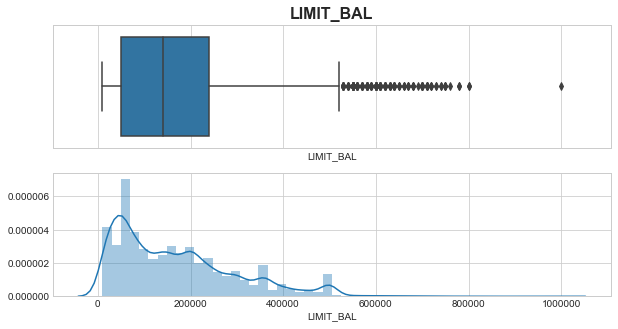

Min: 			 10,000
Lower Quartile: 	 50,000
median: 		 140,000
mean: 			 167,484
Upper Quartile: 	 240,000
max: 			 1,000,000


Skew: 			 0.99
Kurtosis: 		 0.54


In [35]:
# 1. 'LIMIT_BAL';

# X1: Amount of the given credit (NT dollar): 
# it includes both the individual consumer credit and his/her family (supplementary) credit.

# CONTINUOUS

input_series = df['LIMIT_BAL']
inspect_continuous_var(input_series)

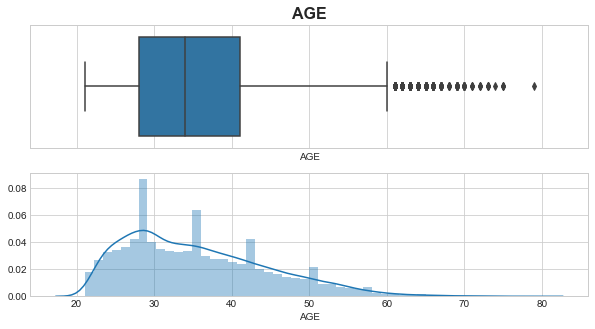

Min: 			 21
Lower Quartile: 	 28
median: 		 34
mean: 			 35
Upper Quartile: 	 41
max: 			 79


Skew: 			 0.73
Kurtosis: 		 0.04


In [36]:
# 2. 'AGE';

# X5: Age (year).

# CONTINUOUS

input_series = df['AGE']
inspect_continuous_var(input_series)

In [37]:
# No data wrangling is needed for 'AGE'.

'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', and 'BILL_AMT6' are described as follows:

    
3. 'BILL_AMT1';
4. 'BILL_AMT2';
5. 'BILL_AMT3';
6. 'BILL_AMT4';
7. 'BILL_AMT5'; and
8. 'BILL_AMT6'.   


X12-X17: Amount of bill statement (NT dollar). 
+ X12 = amount of bill statement in September, 2005; 
+ X13 = amount of bill statement in August, 2005; 
+ . . .; 
+ X17 = amount of bill statement in April, 2005.

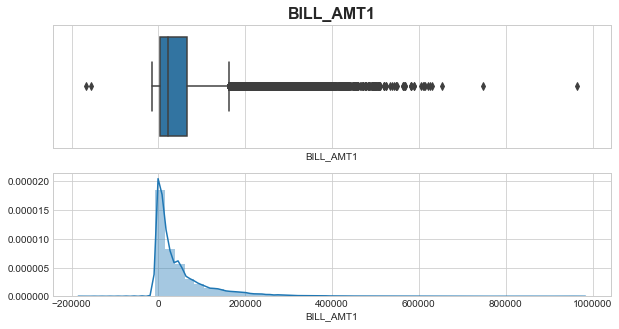

Min: 			 -165,580
Lower Quartile: 	 3,559
median: 		 22,382
mean: 			 51,223
Upper Quartile: 	 67,091
max: 			 964,511


Skew: 			 2.66
Kurtosis: 		 9.81


In [38]:
# 3. 'BILL_AMT1';

# X12 = amount of bill statement in September, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT1']
inspect_continuous_var(input_series)

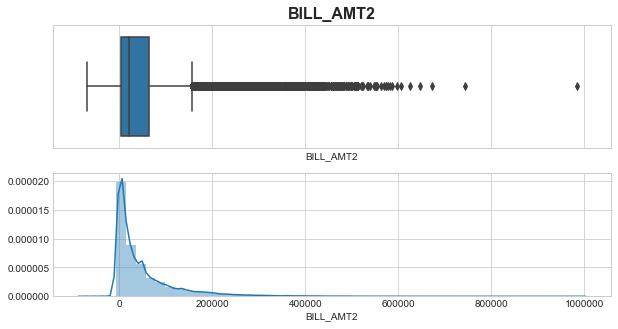

Min: 			 -69,777
Lower Quartile: 	 2,985
median: 		 21,200
mean: 			 49,179
Upper Quartile: 	 64,006
max: 			 983,931


Skew: 			 2.71
Kurtosis: 		 10.30


In [39]:
# 4. 'BILL_AMT2';

# X13 = amount of bill statement in August, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT2']
inspect_continuous_var(input_series)

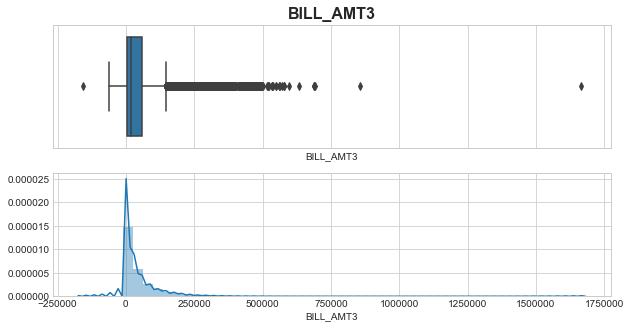

Min: 			 -157,264
Lower Quartile: 	 2,666
median: 		 20,088
mean: 			 47,013
Upper Quartile: 	 60,165
max: 			 1,664,089


Skew: 			 3.09
Kurtosis: 		 19.78


In [40]:
# 5. 'BILL_AMT3';

# X14 = amount of bill statement in July, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT3']
inspect_continuous_var(input_series)

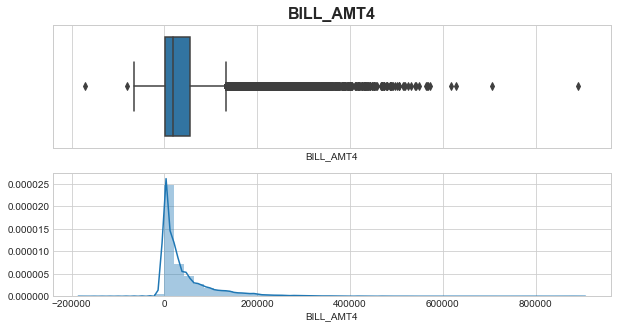

Min: 			 -170,000
Lower Quartile: 	 2,327
median: 		 19,052
mean: 			 43,263
Upper Quartile: 	 54,506
max: 			 891,586


Skew: 			 2.82
Kurtosis: 		 11.31


In [41]:
# 6. 'BILL_AMT4';

# X15 = amount of bill statement in June, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT4']
inspect_continuous_var(input_series)

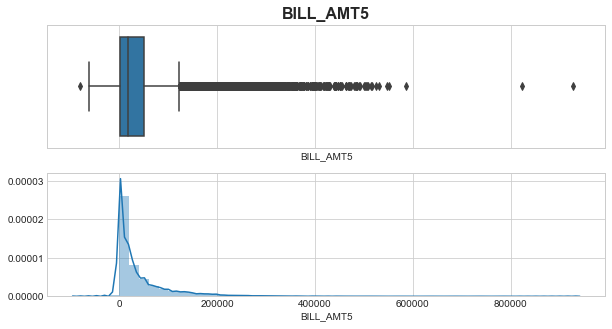

Min: 			 -81,334
Lower Quartile: 	 1,763
median: 		 18,104
mean: 			 40,311
Upper Quartile: 	 50,190
max: 			 927,171


Skew: 			 2.88
Kurtosis: 		 12.31


In [42]:
# 7. 'BILL_AMT5';

# X16 = amount of bill statement in May, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT5']
inspect_continuous_var(input_series)

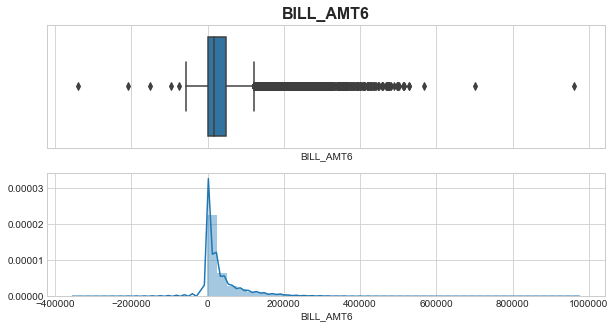

Min: 			 -339,603
Lower Quartile: 	 1,256
median: 		 17,071
mean: 			 38,872
Upper Quartile: 	 49,198
max: 			 961,664


Skew: 			 2.85
Kurtosis: 		 12.27


In [43]:
# 8. 'BILL_AMT6';

# X17 = amount of bill statement in April, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT6']
inspect_continuous_var(input_series)

'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', and 'PAY_AMT6' are described as follows:
    
9. 'PAY_AMT1';
10. 'PAY_AMT2';
11. 'PAY_AMT3';
12. 'PAY_AMT4';
13. 'PAY_AMT5'; and
14. 'PAY_AMT6'.

X18-X23: Amount of previous payment (NT dollar). 
+ X18 = amount paid in September, 2005; 
+ X19 = amount paid in August, 2005; 
+ . . .;
+ X23 = amount paid in April, 2005. 

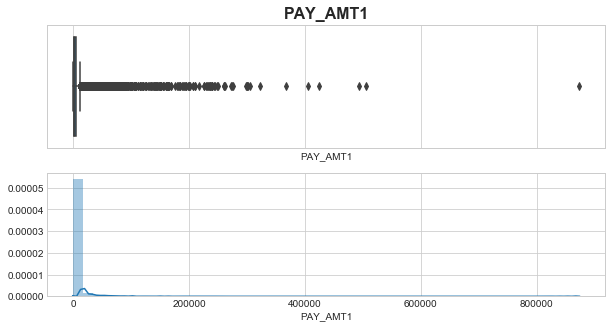

Min: 			 0
Lower Quartile: 	 1,000
median: 		 2,100
mean: 			 5,664
Upper Quartile: 	 5,006
max: 			 873,552


Skew: 			 14.67
Kurtosis: 		 415.25


In [44]:
# 9. 'PAY_AMT1';

# X18 = amount paid in September, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT1']
inspect_continuous_var(input_series)

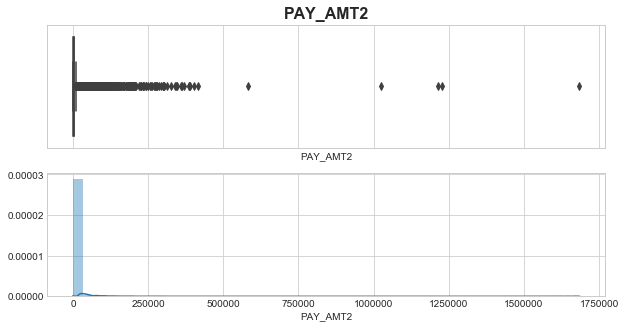

Min: 			 0
Lower Quartile: 	 833
median: 		 2,009
mean: 			 5,921
Upper Quartile: 	 5,000
max: 			 1,684,259


Skew: 			 30.45
Kurtosis: 		 1,641.63


In [45]:
# 10. 'PAY_AMT2';

# X19 = amount paid in August, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT2']
inspect_continuous_var(input_series)

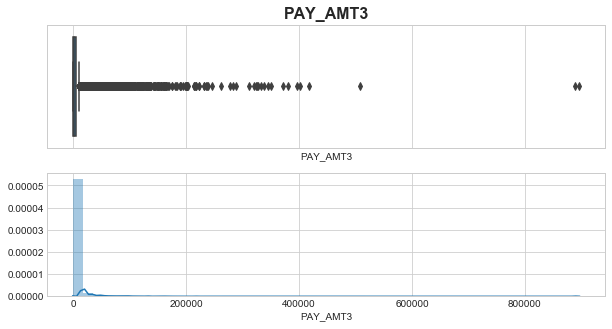

Min: 			 0
Lower Quartile: 	 390
median: 		 1,800
mean: 			 5,226
Upper Quartile: 	 4,505
max: 			 896,040


Skew: 			 17.22
Kurtosis: 		 564.31


In [46]:
# 11. 'PAY_AMT3';

# X20 = amount paid in July, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT3']
inspect_continuous_var(input_series)

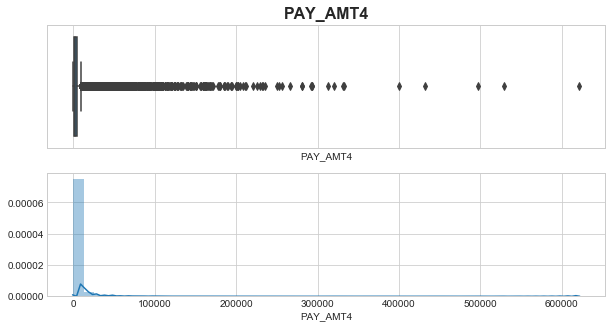

Min: 			 0
Lower Quartile: 	 296
median: 		 1,500
mean: 			 4,826
Upper Quartile: 	 4,013
max: 			 621,000


Skew: 			 12.90
Kurtosis: 		 277.33


In [47]:
# 12. 'PAY_AMT4';

# X21 = amount paid in June, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT4']
inspect_continuous_var(input_series)

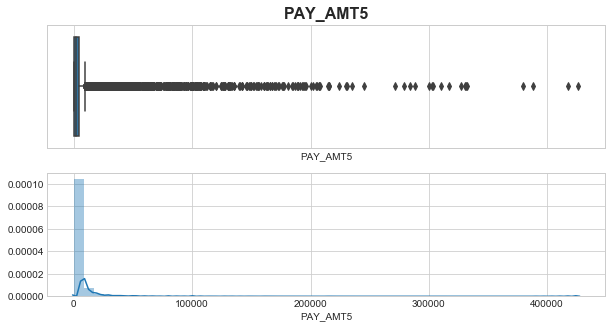

Min: 			 0
Lower Quartile: 	 252
median: 		 1,500
mean: 			 4,799
Upper Quartile: 	 4,032
max: 			 426,529


Skew: 			 11.13
Kurtosis: 		 180.06


In [48]:
# 13. 'PAY_AMT5';

# X22 = amount paid in May, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT5']
inspect_continuous_var(input_series)

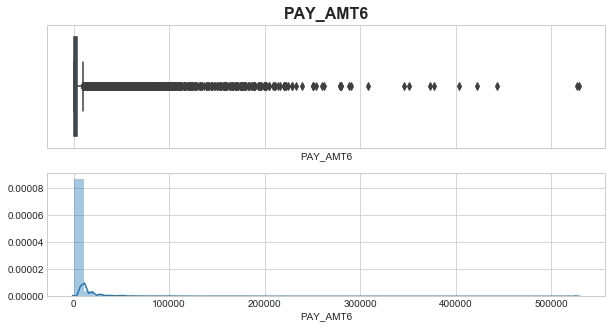

Min: 			 0
Lower Quartile: 	 118
median: 		 1,500
mean: 			 5,216
Upper Quartile: 	 4,000
max: 			 528,666


Skew: 			 10.64
Kurtosis: 		 167.16


In [49]:
# 14. 'PAY_AMT6'.

# X23 = amount paid in April, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT6']
inspect_continuous_var(input_series)

## Export edited DataFrame to new csv file

In [50]:
temp_df = pd.read_excel(raw_data_file)
header_list = list(temp_df.columns)
header_list.insert(0, '')

In [51]:
df_edited_2 = df_edited.copy()
df_edited_2.reset_index(inplace=True)

arrays = [header_list, list(df_edited_2.columns)]
df_edited_2.columns = arrays

new_file_name = 'dataset_wrangled.csv'
new_file_path = os.path.join(interim_data_dir,
                             new_file_name)

df_edited_2.to_csv(new_file_path, 
                   index=False)

## Call our .py file to wrangle data and export `csv`

In [52]:
# import my function from the source code
from data.wrangle_dataset import create_wrangled_dataset

In [53]:
# Create'dataset_wrangled.csv'
create_wrangled_dataset(new_file_name='dataset_wrangled.csv')

# Create exhibits for the final report

In [54]:
# Save the path to the folder that will contain 
# the figures for the final report:
# /reports/figures
figures_dir = os.path.join(proj_root,
                                "reports",
                                "figures")

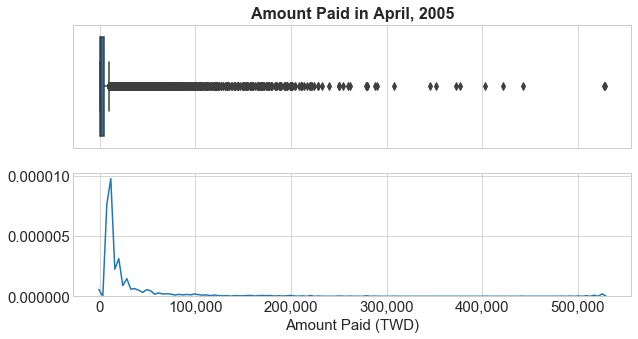

In [55]:
# figure file_name
fig_file_name = 'outliers_figure'

# figure file_path
fig_path = os.path.join(figures_dir,
                        fig_file_name)

# Display boxplot and histogram/kde.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5) )
sns.boxplot(x=df['PAY_AMT6'], ax=ax1)
ax1.set(xlabel='')

#sns.distplot(df['PAY_AMT6'], ax=ax2, 
#             axlabel= 'Amount Paid (TWD)')
sns.kdeplot(df['PAY_AMT6'], ax=ax2)


fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax2.xaxis.set_major_formatter(tick) 

ax2.set_xlabel('Amount Paid (TWD)',fontsize=15)
ax2.tick_params(labelsize=15)

# remove legend from axis 'ax2'
ax2.legend_.remove()

font = {'weight' : 'bold',
        'size'   : 16}
ax1.set_title('Amount Paid in April, 2005', fontdict=font)

# Save the figure
plt.savefig(fig_path, dpi = 300)
plt.show()

### Calculate some stats about the distribution shown above.

#### Exchange Rate: New Taiwan Dollars to One U.S. Dollar

Source: https://fred.stlouisfed.org/series/AEXTAUS

In [56]:
#Exchange Rate: New Taiwan Dollars to One U.S. Dollar in 2005
twd_usd_xr = 32.131

In [57]:
print('Percentage of accounts for which the amount paid')
print('in April, 2005 was NT$0:')
print('{:,.1f}%'.format(100 * np.sum(df['PAY_AMT6'] == 0) / len(df)))

Percentage of accounts for which the amount paid
in April, 2005 was NT$0:
23.9%


In [58]:
print('Percentage of accounts for which the amount paid')
print('in April, 2005 was less than NT$10,000:')
print('{:,.1f}%'.format(100 * np.sum(df['PAY_AMT6'] < 10000) / len(df)))

print('(In 2005, NT$10,000 = USD {:,.0f}.)'.format(10000 / twd_usd_xr))

Percentage of accounts for which the amount paid
in April, 2005 was less than NT$10,000:
90.2%
(In 2005, NT$10,000 = USD 311.)


In [59]:
print('Maximum amount paid in April, 2005:')
print('NT${:,.0f}'.format(df['PAY_AMT6'].max()))
print('(In 2005, NT$10,000 = USD {:,.0f}.)'\
      .format(df['PAY_AMT6'].max() / twd_usd_xr))

Maximum amount paid in April, 2005:
NT$528,666
(In 2005, NT$10,000 = USD 16,453.)


In [60]:
print('Minimum amount paid in April, 2005:')
print('NT${:,.0f}'.format(df['PAY_AMT6'].min()))

Minimum amount paid in April, 2005:
NT$0
